In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns 
sns.set()

In [2]:
pitchers = pd.read_csv('PitcherLeaderboardData.csv')

pitchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 8 columns):
Name              18417 non-null object
PITCHER_THROWS    18417 non-null object
pitch_type        18417 non-null object
velo              18417 non-null float64
brk_x             18417 non-null float64
brk_z             18417 non-null float64
spin_rate         18408 non-null float64
extension         18392 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [3]:
pitchers = pitchers.dropna()

pitchers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18383 entries, 0 to 18416
Data columns (total 8 columns):
Name              18383 non-null object
PITCHER_THROWS    18383 non-null object
pitch_type        18383 non-null object
velo              18383 non-null float64
brk_x             18383 non-null float64
brk_z             18383 non-null float64
spin_rate         18383 non-null float64
extension         18383 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [4]:
pitchers.describe()

,velo,brk_x,brk_z,spin_rate,extension
count,18383.000000,18383.000000,18383.000000,18383.000000,18383.000000
mean,87.366620,1.229463,5.792375,2240.527961,6.059642
std,5.819996,6.664969,5.399473,301.600108,0.515799
min,67.872000,-25.529000,-13.924000,757.084000,2.787300
25%,82.988000,-4.614000,2.719000,2075.833000,5.714700
50%,88.799000,2.124000,6.891000,2231.496000,6.031400
75%,91.923000,6.784500,9.474500,2428.510000,6.385750
max,99.309000,32.247000,21.141000,3284.972000,9.015100


In [5]:
pitchers['abs_brk_x'] = pitchers['brk_x'].abs()
pitchers['abs_brk_z'] = pitchers['brk_z'].abs()

In [6]:
fastballs = pitchers.loc[pitchers['pitch_type'] == 'FB'].groupby(['Name']).mean()
breaking_balls = pitchers.loc[pitchers['pitch_type'] == 'BRK'].groupby(['Name']).mean()
changeups = pitchers.loc[pitchers['pitch_type'] == 'CH'].groupby(['Name']).mean()

fastballs.head()

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z
Name,,,,,,,
Ben Williams,93.737541,1.934997,10.230068,2185.280364,6.107350,5.868931,10.230068
Billy Chapel,88.651426,3.520420,9.063400,2225.789653,5.407402,8.574981,9.063400
Billy Heywood,88.787602,1.568347,10.576133,2183.546796,6.064465,5.493388,10.576133
Bo Gentry,90.579018,3.464865,5.463685,1791.540775,5.662423,8.281459,5.473036
Charlie Donovan,90.542049,-0.160383,7.354879,2083.957433,6.066019,6.151367,7.362533


In [7]:
velo_leaderboard = fastballs.sort_values(by='velo', ascending = False)
velo_leaderboard['velo_rank'] = velo_leaderboard['velo'].rank() 

velo_leaderboard.head(15)

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z,velo_rank
Name,,,,,,,,
Jack Bradfield,95.790843,0.230905,8.416900,2173.339200,6.075599,8.475749,8.421689,30.0
Mel Clark,94.803957,-0.891849,9.059926,2537.475436,6.244304,8.729298,9.059926,29.0
Jim Bowers,93.953211,0.144644,12.730328,2374.142378,7.084620,2.823622,12.730328,28.0
George Knox,93.894410,0.491782,7.704756,2567.776427,6.860135,5.061252,7.704756,27.0
Ben Williams,93.737541,1.934997,10.230068,2185.280364,6.107350,5.868931,10.230068,26.0
Hank Murphy,93.685198,0.459972,7.248163,2478.010618,6.651075,4.442212,7.277512,25.0
Ed Dweeb,93.300103,-2.826359,5.776667,2043.349026,5.754890,10.718359,5.776667,24.0
Lonnie Ritter,92.983214,0.541065,6.127768,2085.497988,5.644578,8.298397,6.127768,23.0
Mickey Scales,92.845043,-0.739179,11.898200,2315.020054,6.322014,4.569878,11.898200,22.0


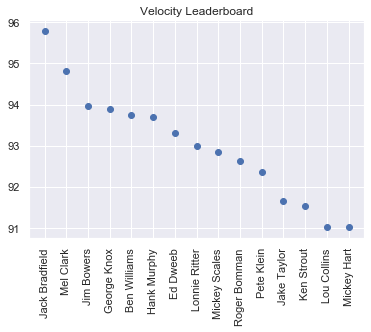

In [8]:
plt.scatter(velo_leaderboard.head(15).index, velo_leaderboard['velo'].head(15))
plt.title('Velocity Leaderboard');
plt.xticks(rotation=90);

In [26]:
fb_brk = pitchers.loc[pitchers['pitch_type'] != 'CH'].groupby(['Name']).mean()

spin_rate_leaderboard = fb_brk.sort_values(by='spin_rate', ascending = False)
spin_rate_leaderboard['spin_rank'] = spin_rate_leaderboard['spin_rate'].rank()
spin_rate_leaderboard.head(15)

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z,spin_rank
Name,,,,,,,,
Davis Birch,83.079701,0.188867,1.333340,2782.682912,5.559894,4.263938,7.130758,30.0
Hank Murphy,89.520520,0.123964,4.256103,2604.408225,6.345217,2.667045,4.430288,29.0
George Knox,91.366799,1.098339,6.019826,2537.386576,6.750183,5.285030,6.322648,28.0
Ken Strout,87.698534,-0.048907,5.250743,2527.332234,5.923746,5.585465,7.539712,27.0
Roger Dorn,85.418817,2.158764,5.256467,2445.534147,6.177227,8.265542,8.243519,26.0
Mel Clark,90.069593,-0.641733,6.289300,2420.200576,6.069579,6.686377,6.549905,25.0
Roger Bomman,89.305876,-0.000173,4.813620,2407.067134,6.203592,7.276052,7.562847,24.0
Jim Bowers,91.016448,0.236796,9.425131,2385.027560,7.029275,2.912635,12.056223,23.0
Mickey Scales,90.764474,-0.214774,9.996954,2356.441315,6.255106,4.246898,10.062028,22.0


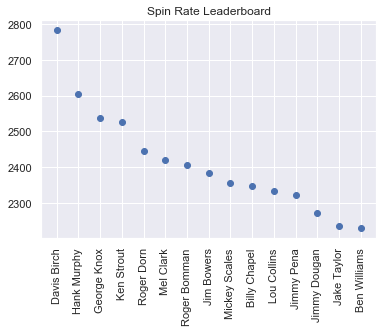

In [27]:
plt.scatter(spin_rate_leaderboard.head(15).index, spin_rate_leaderboard['spin_rate'].head(15))
plt.title('Spin Rate Leaderboard');
plt.xticks(rotation=90);

In [11]:
spin_rate_fastballs = fastballs.groupby(['Name']).mean().sort_values(by='spin_rate', ascending = False)
spin_rate_fastballs['spin_rank'] = spin_rate_fastballs['spin_rate'].rank()
spin_rate_leaderboard.head(15)

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z,spin_rank
Name,,,,,,,,
Davis Birch,83.056352,0.156752,1.450193,2774.550073,5.559418,4.189409,7.134168,30.0
Hank Murphy,89.111588,0.747188,4.066303,2542.473506,6.333295,3.099107,4.271007,29.0
Ken Strout,87.538544,0.340939,5.428481,2493.658700,5.929800,5.701219,7.594030,28.0
George Knox,91.155893,1.907711,5.753540,2482.358803,6.750164,5.679312,6.019604,27.0
Roger Bomman,88.698318,0.207203,4.851406,2401.370182,6.224722,7.512005,7.253179,26.0
Jim Bowers,91.016448,0.236796,9.425131,2385.027560,7.029275,2.912635,12.056223,25.0
Roger Dorn,84.083009,2.834964,5.465093,2365.436237,6.173496,8.621123,7.816417,24.0
Mickey Scales,90.376899,0.168738,9.788833,2330.276718,6.293415,4.492998,9.850052,23.0
Lou Collins,83.808787,2.424715,3.589890,2325.191554,5.810429,6.799743,8.042862,22.0


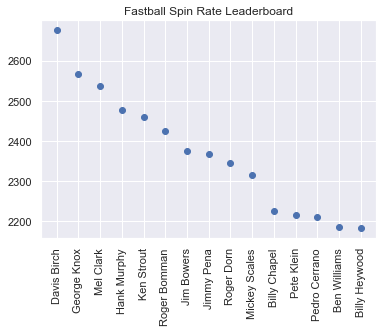

In [12]:
plt.scatter(spin_rate_fastballs.head(15).index, spin_rate_fastballs['spin_rate'].head(15))
plt.title('Fastball Spin Rate Leaderboard');
plt.xticks(rotation=90);

In [13]:
spin_rate_brk = breaking_balls.groupby(['Name']).mean().sort_values(by='spin_rate', ascending = False)
spin_rate_brk['spin_rank'] = spin_rate_brk['spin_rate'].rank()
spin_rate_brk.head(15)

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z,spin_rank
Name,,,,,,,,
Davis Birch,76.581750,-0.492595,-9.124077,3015.190964,5.385144,6.262631,9.234411,30.0
Lou Collins,77.209292,0.144745,-7.841802,2727.135391,5.533179,8.152068,7.841802,29.0
Jimmy Dougan,79.437933,4.091711,-1.812333,2721.004111,5.355142,7.454156,1.870822,28.0
Roger Dorn,76.547973,-0.430895,-5.498891,2714.732095,5.806134,4.052568,5.498891,27.0
Hank Murphy,86.638848,-0.108531,2.185802,2691.866716,6.133584,1.438751,2.460203,26.0
Ken Strout,79.561386,0.772552,-3.534162,2672.078789,5.406291,6.964552,3.571182,25.0
Billy Chapel,78.593911,-0.340691,-1.311939,2619.158024,5.239233,3.665180,1.793064,24.0
Mickey Scales,82.377584,1.899130,2.332925,2523.412733,5.985398,2.944944,2.660317,23.0
Jim Bowers,75.773250,0.715107,-7.730417,2441.526833,6.742011,3.374655,8.557298,22.0


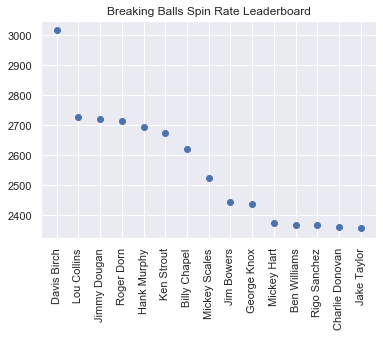

In [14]:
plt.scatter(spin_rate_brk.head(15).index, spin_rate_brk['spin_rate'].head(15))
plt.title('Breaking Balls Spin Rate Leaderboard');
plt.xticks(rotation=90);

In [15]:
extension_leaderboard = pitchers.groupby(['Name']).mean()

extension_leaderboard = extension_leaderboard.sort_values(by='extension', ascending = False)
extension_leaderboard['ext_rank'] = extension_leaderboard['extension'].rank()

extension_leaderboard.head(15)

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z,ext_rank
Name,,,,,,,,
Jim Bowers,91.016448,0.236796,9.425131,2385.027560,7.029275,2.912635,12.056223,30.0
Jake Taylor,88.046972,1.631406,5.281923,2209.462741,6.906651,5.830897,5.544483,29.0
George Knox,91.155893,1.907711,5.753540,2482.358803,6.750164,5.679312,6.019604,28.0
Terrence Mann,85.937097,0.519152,5.025622,2026.549256,6.560645,6.701775,5.145005,27.0
Mickey Hart,88.825838,1.308135,11.673027,2169.144541,6.508680,3.689892,11.673027,26.0
Larry Fisher,86.492505,1.291354,6.820084,1936.101671,6.439176,3.645978,6.843843,25.0
Hank Murphy,89.111588,0.747188,4.066303,2542.473506,6.333295,3.099107,4.271007,24.0
Pete Klein,87.646960,1.626327,8.535822,2141.269149,6.319681,4.927020,11.555842,23.0
Mickey Scales,90.376899,0.168738,9.788833,2330.276718,6.293415,4.492998,9.850052,22.0


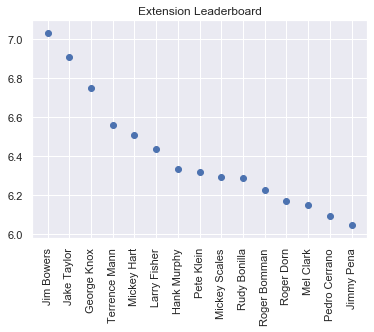

In [16]:
plt.scatter(extension_leaderboard.head(15).index, extension_leaderboard['extension'].head(15))
plt.title('Extension Leaderboard');
plt.xticks(rotation=90);

In [17]:
overall_velo = velo_leaderboard.drop(['brk_x', 'brk_z', 'spin_rate', 'extension', 'abs_brk_x', 'abs_brk_z'], axis = 1)
overall_spin = spin_rate_leaderboard.drop(['velo', 'brk_x', 'brk_z', 'extension', 'abs_brk_x', 'abs_brk_z'], axis = 1)
overall_extension = extension_leaderboard.drop(['velo', 'brk_x', 'brk_z', 'spin_rate', 'abs_brk_x', 'abs_brk_z'], axis = 1)

overall_pitchers = overall_extension.join(overall_velo.join(overall_spin))
overall_pitchers.head()

,extension,ext_rank,velo,velo_rank,spin_rate,spin_rank
Name,,,,,,
Jim Bowers,7.029275,30.0,93.953211,28.0,2385.027560,25.0
Jake Taylor,6.906651,29.0,91.662316,19.0,2209.462741,18.0
George Knox,6.750164,28.0,93.894410,27.0,2482.358803,27.0
Terrence Mann,6.560645,27.0,90.118923,12.0,2026.549256,4.0
Mickey Hart,6.508680,26.0,91.006673,16.0,2169.144541,16.0


In [18]:
overall_pitchers['final_rank'] = overall_pitchers['ext_rank']+overall_pitchers['velo_rank']+overall_pitchers['spin_rank']

overall_pitchers.sort_values(by='final_rank', ascending = False).head(15)

,extension,ext_rank,velo,velo_rank,spin_rate,spin_rank,final_rank
Name,,,,,,,
Jim Bowers,7.029275,30.0,93.953211,28.0,2385.027560,25.0,83.0
George Knox,6.750164,28.0,93.894410,27.0,2482.358803,27.0,82.0
Hank Murphy,6.333295,24.0,93.685198,25.0,2542.473506,29.0,78.0
Roger Bomman,6.224722,20.0,92.617665,21.0,2401.370182,26.0,67.0
Mickey Scales,6.293415,22.0,92.845043,22.0,2330.276718,23.0,67.0
Mel Clark,6.151364,18.0,94.803957,29.0,2289.718779,20.0,67.0
Jake Taylor,6.906651,29.0,91.662316,19.0,2209.462741,18.0,66.0
Ken Strout,5.929800,13.0,91.519024,18.0,2493.658700,28.0,59.0
Mickey Hart,6.508680,26.0,91.006673,16.0,2169.144541,16.0,58.0


In [19]:
offspeed = pitchers.loc[pitchers['pitch_type'] != 'FB'].groupby(['Name']).mean()
offspeed.head()

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z
Name,,,,,,,
Ben Williams,82.433293,2.962403,2.417521,2074.044475,5.660327,6.259428,4.731335
Billy Chapel,79.177802,2.398467,0.886573,2445.883596,5.315081,5.634508,3.168227
Billy Heywood,78.396443,0.899814,2.379786,1694.492157,5.612014,4.245843,2.866843
Bo Gentry,81.259057,0.785811,1.712283,1982.554660,5.749066,2.027509,2.325453
Charlie Donovan,82.134094,2.053697,1.135224,2227.299468,5.565498,4.016026,3.917982


In [20]:
brk_x_leaderboard = offspeed.sort_values(by='abs_brk_x', ascending = False)
brk_x_leaderboard['brk_x_rank'] = brk_x_leaderboard['abs_brk_x'].rank() 

brk_x_leaderboard.head(15)

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z,brk_x_rank
Name,,,,,,,,
Lou Collins,76.443567,3.618402,-3.873223,2527.272659,5.735102,8.537877,5.132229,30.0
Roger Bomman,80.306306,1.706380,-1.602580,2350.204310,5.982732,8.092867,5.941812,29.0
Jimmy Dougan,79.607320,3.798240,-1.209880,2593.166080,5.402280,7.506240,2.104960,28.0
Ken Strout,80.442905,1.723408,-1.607264,2554.778538,5.507505,7.061799,4.369372,27.0
Roger Dorn,77.842205,2.445973,0.355551,2392.693144,5.982512,6.987727,5.866968,26.0
George Knox,85.434348,4.865991,1.676893,2303.896982,6.520404,6.970616,2.498839,25.0
Terrence Mann,79.364204,1.170898,2.198594,1845.427764,6.105907,6.396650,2.505620,24.0
Ben Williams,82.433293,2.962403,2.417521,2074.044475,5.660327,6.259428,4.731335,23.0
Mickey Hart,83.671136,4.602182,6.622182,2193.807545,6.248500,6.181909,6.622182,22.0


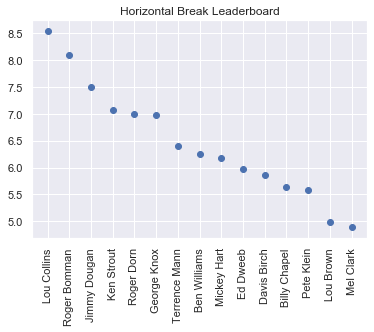

In [21]:
plt.scatter(brk_x_leaderboard.head(15).index, brk_x_leaderboard['abs_brk_x'].head(15))
plt.title('Horizontal Break Leaderboard');
plt.xticks(rotation=90);

In [22]:
brk_z_leaderboard = offspeed.sort_values(by='abs_brk_z', ascending = False)
brk_z_leaderboard['brk_z_rank'] = brk_x_leaderboard['abs_brk_z'].rank() 

brk_z_leaderboard.head(15)

,velo,brk_x,brk_z,spin_rate,extension,abs_brk_x,abs_brk_z,brk_z_rank
Name,,,,,,,,
Rigo Sanchez,81.752732,-0.041111,3.724725,2321.570484,5.738521,1.458183,10.102556,30.0
Davis Birch,77.077250,-0.528984,-7.866717,2970.751158,5.398923,5.866864,9.061641,29.0
Jim Bowers,75.773250,0.715107,-7.730417,2441.526833,6.742011,3.374655,8.557298,28.0
Pete Klein,74.769259,2.343222,-3.437852,1936.265370,6.140559,5.581963,7.859259,27.0
Mickey Hart,83.671136,4.602182,6.622182,2193.807545,6.248500,6.181909,6.622182,26.0
Jimmy Pena,82.579787,0.999277,6.180085,1634.464809,5.571549,3.358128,6.180085,25.0
Roger Bomman,80.306306,1.706380,-1.602580,2350.204310,5.982732,8.092867,5.941812,24.0
Roger Dorn,77.842205,2.445973,0.355551,2392.693144,5.982512,6.987727,5.866968,23.0
Lou Collins,76.443567,3.618402,-3.873223,2527.272659,5.735102,8.537877,5.132229,22.0


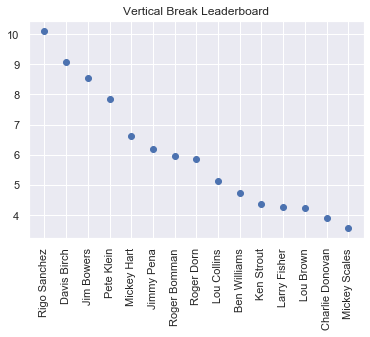

In [23]:
plt.scatter(brk_z_leaderboard.head(15).index, brk_z_leaderboard['abs_brk_z'].head(15))
plt.title('Vertical Break Leaderboard');
plt.xticks(rotation=90);

In [24]:
overall_brk_x = brk_x_leaderboard.drop(['brk_x', 'brk_z', 'spin_rate', 'extension', 'velo', 'abs_brk_z'], axis = 1)
overall_brk_z = brk_z_leaderboard.drop(['velo', 'brk_x', 'brk_z', 'extension', 'abs_brk_x', 'spin_rate'], axis = 1)

overall_pitchers_with_break = overall_pitchers.join(overall_brk_x.join(overall_brk_z))
#overall_pitchers_with_break = overall_pitchers_with_break.drop(['final_rank'])
overall_pitchers_with_break['new_final_rank'] = overall_pitchers_with_break['ext_rank']+overall_pitchers['velo_rank']+overall_pitchers['spin_rank']+overall_pitchers_with_break['brk_x_rank']+overall_pitchers_with_break['brk_z_rank']

overall_pitchers_leaderboard = overall_pitchers_with_break.sort_values(by='new_final_rank', ascending = False)
overall_pitchers_leaderboard.head(15)

,extension,ext_rank,velo,velo_rank,spin_rate,spin_rank,final_rank,abs_brk_x,brk_x_rank,abs_brk_z,brk_z_rank,new_final_rank
Name,,,,,,,,,,,,
Roger Bomman,6.224722,20.0,92.617665,21.0,2401.370182,26.0,67.0,8.092867,29.0,5.941812,24.0,120.0
Jim Bowers,7.029275,30.0,93.953211,28.0,2385.027560,25.0,83.0,3.374655,7.0,8.557298,28.0,118.0
George Knox,6.750164,28.0,93.894410,27.0,2482.358803,27.0,82.0,6.970616,25.0,2.498839,6.0,113.0
Mickey Hart,6.508680,26.0,91.006673,16.0,2169.144541,16.0,58.0,6.181909,22.0,6.622182,26.0,106.0
Ken Strout,5.929800,13.0,91.519024,18.0,2493.658700,28.0,59.0,7.061799,27.0,4.369372,20.0,106.0
Pete Klein,6.319681,23.0,92.345581,20.0,2141.269149,12.0,55.0,5.581963,18.0,7.859259,27.0,100.0
Lou Collins,5.810429,8.0,91.013019,17.0,2325.191554,22.0,47.0,8.537877,30.0,5.132229,22.0,99.0
Mel Clark,6.151364,18.0,94.803957,29.0,2289.718779,20.0,67.0,4.890037,16.0,3.509285,15.0,98.0
Roger Dorn,6.173496,19.0,88.726590,6.0,2365.436237,24.0,49.0,6.987727,26.0,5.866968,23.0,98.0


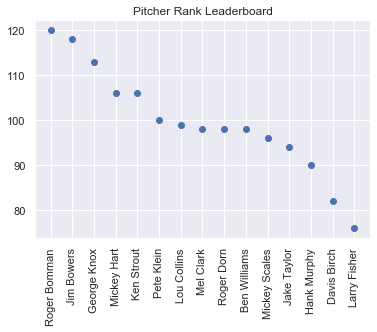

In [25]:
plt.scatter(overall_pitchers_leaderboard.head(15).index, overall_pitchers_leaderboard['new_final_rank'].head(15))
plt.title('Pitcher Rank Leaderboard');
plt.xticks(rotation=90);